# Driving7x7RoundAbout-n2-v0 KLR Experiment analysis

In [1]:
from pprint import pprint
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents
import posggym_agents.exp.plot_utils as policy_plot_utils

import baposgmcp.plot as plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "Driving", "Driving7x7RoundAbout-n2-v0", "results", "klr_experiment_results.csv"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "driving7x7roundabout_n2_v0", "results", "klrbr_results.csv"
)

## Loading Heuristic Policy Data

In [2]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True
)
policy_df.columns

coplayer_policy_ids = policy_df["policy_id"].unique().tolist()
coplayer_policy_ids.sort()
print(coplayer_policy_ids)

['klr_k0_seed0-v0', 'klr_k0_seed1-v0', 'klr_k0_seed2-v0', 'klr_k0_seed3-v0', 'klr_k0_seed4-v0', 'klr_k1_seed0-v0', 'klr_k1_seed1-v0', 'klr_k1_seed2-v0', 'klr_k1_seed3-v0', 'klr_k1_seed4-v0', 'klr_k2_seed0-v0', 'klr_k2_seed1-v0', 'klr_k2_seed2-v0', 'klr_k2_seed3-v0', 'klr_k2_seed4-v0', 'klr_k3_seed0-v0', 'klr_k3_seed1-v0', 'klr_k3_seed2-v0', 'klr_k3_seed3-v0', 'klr_k3_seed4-v0', 'klr_k4_seed0-v0', 'klr_k4_seed1-v0', 'klr_k4_seed2-v0', 'klr_k4_seed3-v0', 'klr_k4_seed4-v0', 'klrbr_k4_seed0-v0', 'klrbr_k4_seed1-v0', 'klrbr_k4_seed2-v0', 'klrbr_k4_seed3-v0', 'klrbr_k4_seed4-v0', 'uniform_random-v0']


## Loading BAPOSGMCP Data

In [3]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_5
   POMetaRollout_pucb_6
   POMeta_5
   POMeta_6
   baposgmcp_5
   baposgmcp_6
   klr_k0_seed0-v0
   klr_k1_seed0-v0
   metabaseline

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   time_limit
   episode_step_limit
   policy_id
   discount
   c_init
   c_base
   truncated
   action_selection
   dirichlet_alpha
   root_exploration_fraction
   extra_particles_prop
   step_limit
   epsilon
   other_policy_dist
   meta_policy_dict
   num_sims
   action_dist_distance_0
   action_dist_distance_1
   action_dist_distance_0_0
   action_dist_distance_0_1
   action_dist_distance_0_2
   action_dist_distance_0_3
   action_dist_distance_0_4
   action_dist_distance_0_5
   action_dist_distance_0_6
   action_dist_distance_0_7
   action_dist_distance_0_8
   action_dist_distance_0_9
   action_dist_distance_0_10
   action_dist_distance_0_11
   action_dist_distance_0_12
   action_dist_distance_0_13
   action_dist_distan

In [4]:
# Drop unneeded co-player policies
policies_to_keep = policy_ids
policy_df = policy_df[policy_df["policy_id"].isin(policies_to_keep)]
coplayer_policy_ids = policy_df["policy_id"].unique().tolist()
coplayer_policy_ids.sort()
print(coplayer_policy_ids)

['klr_k0_seed0-v0', 'klr_k1_seed0-v0']


## Combine data

In [5]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop = True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_pucb_5
   POMetaRollout_pucb_6
   POMeta_5
   POMeta_6
   baposgmcp_5
   baposgmcp_6
   klr_k0_seed0-v0
   klr_k1_seed0-v0
   metabaseline

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   exp_seed
   num_episodes
   time_limit
   episode_step_limit
   policy_id
   discount
   c_init
   c_base
   truncated
   action_selection
   dirichlet_alpha
   root_exploration_fraction
   extra_particles_prop
   step_limit
   epsilon
   other_policy_dist
   meta_policy_dict
   num_sims
   action_dist_distance_0
   action_dist_distance_1
   action_dist_distance_0_0
   action_dist_distance_0_1
   action_dist_distance_0_2
   action_dist_distance_0_3
   action_dist_distance_0_4
   action_dist_distance_0_5
   action_dist_distance_0_6
   action_dist_distance_0_7
   action_dist_distance_0_8
   action_dist_distance_0_9
   action_dist_distance_0_10
   action_dist_distance_0_11
   action_dist_distance_0_12
   action_dist_distance_0_13
   action_dist_distan

## Pairwise performance by number of simulations

Here we look at the performance of each policy against each other policy including BAPOSGMCP using different number of simulations.

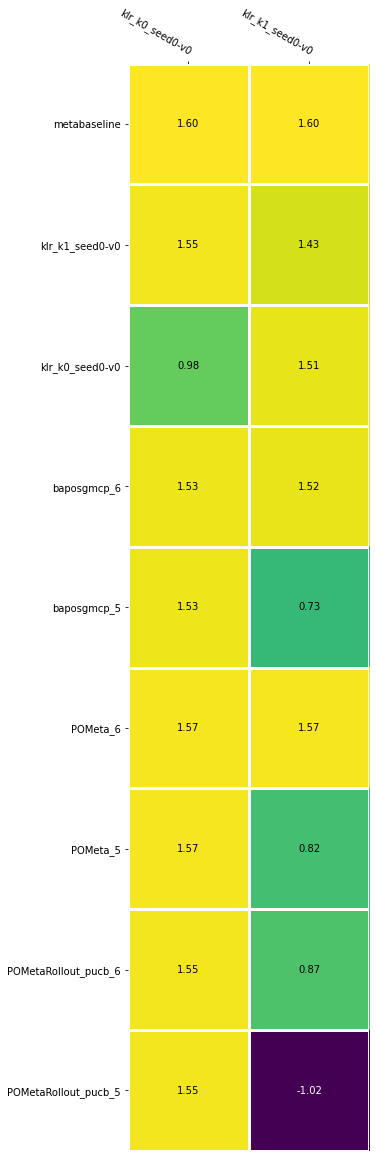

In [6]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_mean", 
    policy_key="policy_id",
    y_err_key=None,   # See next plot
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

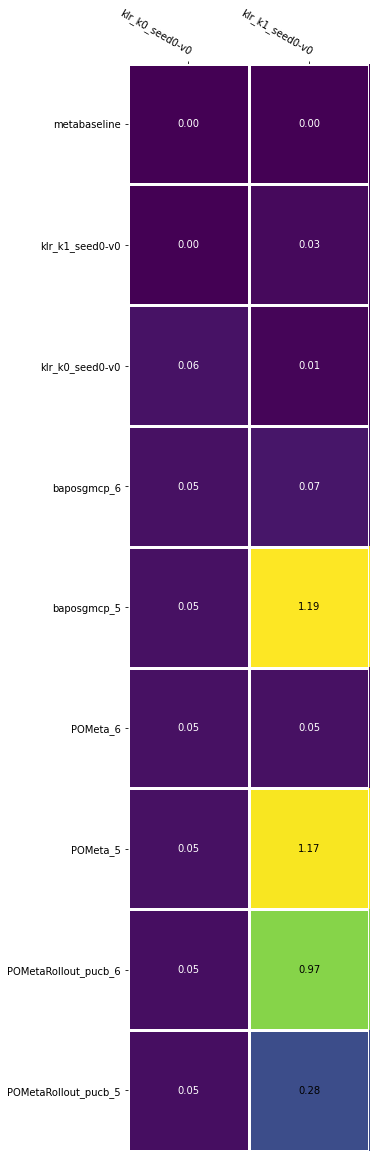

In [7]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_returns_CI", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(20, 20), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

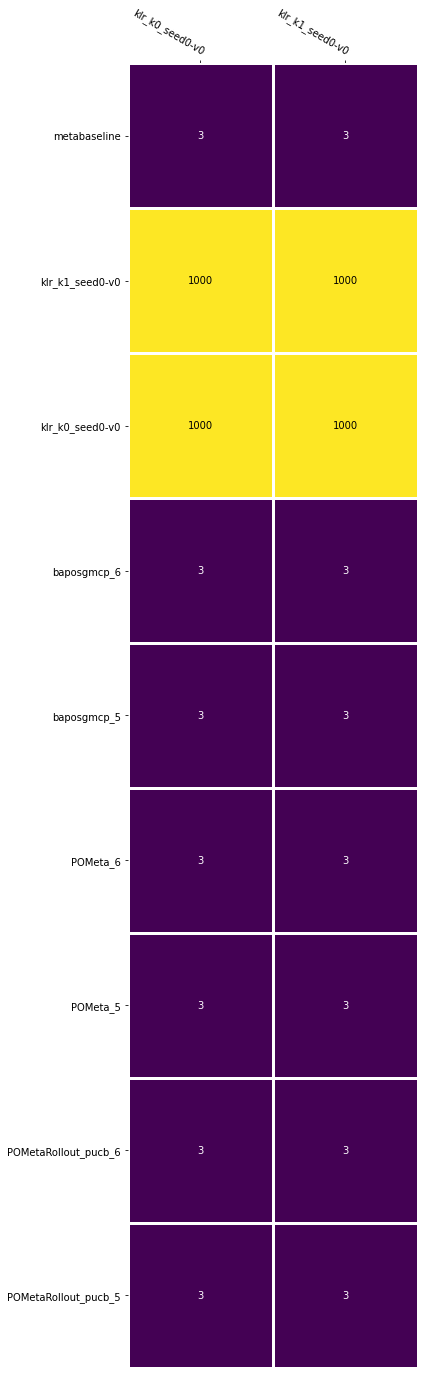

In [8]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(24, 24), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [9]:
# Uniform
policy_prior = {1: {
    pi_id: 1/len(coplayer_policy_ids) 
    for pi_id in coplayer_policy_ids
}}

pprint(policy_prior)

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb",
    # "POMetaRollout_ucb",
    # "POMetaRollout_uniform",
    "POMeta",
    "baposgmcp",
    # "baposgmcp_ucb"
]

policies_without_sims = [
    "metabaseline"
]

{1: {'klr_k0_seed0-v0': 0.5, 'klr_k1_seed0-v0': 0.5}}


In [10]:
expected_mean_returns_values, expected_mean_returns_err_values, policy_ids = plot_utils.get_expected_values_by_prior(
    combined_df,
    y_key="episode_returns_mean",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_pucb_5 = 0.27 +/- 0.16
POMetaRollout_pucb_6 = 1.21 +/- 0.51
POMeta_5 = 1.19 +/- 0.61
POMeta_6 = 1.57 +/- 0.05
baposgmcp_5 = 1.13 +/- 0.62
baposgmcp_6 = 1.52 +/- 0.06
klr_k0_seed0-v0 = 1.24 +/- 0.04
klr_k1_seed0-v0 = 1.49 +/- 0.02
metabaseline = 1.60 +/- 0.00


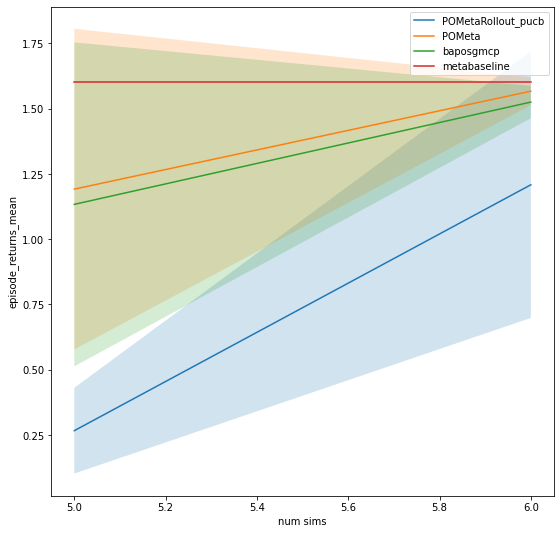

In [12]:
plot_utils.plot_expected_values_by_num_sims(
    y_key="episode_returns_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=policy_ids,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

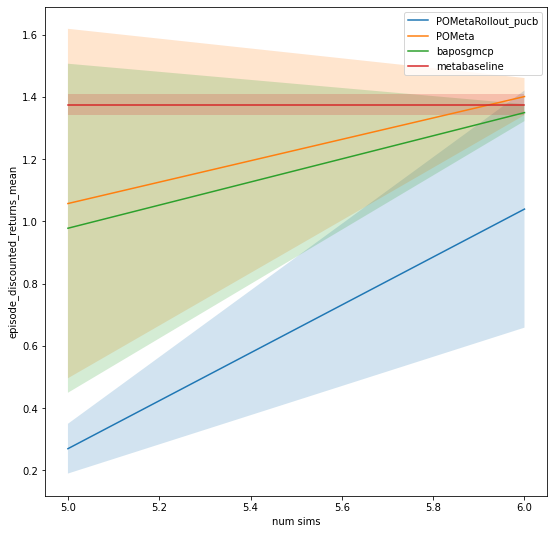

In [13]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_discounted_returns_mean",
    y_err_key="episode_discounted_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

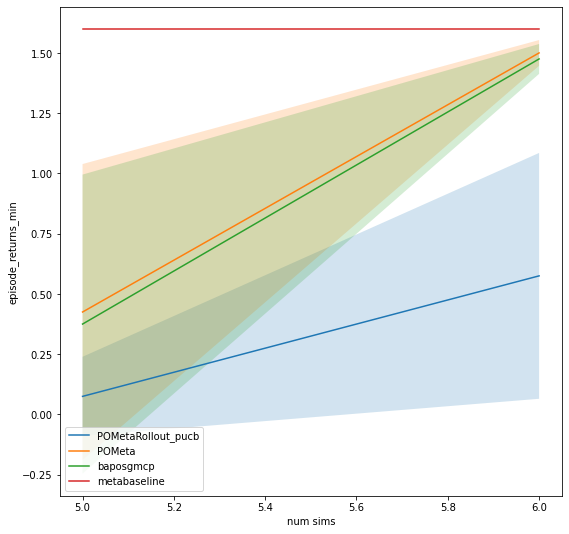

In [14]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_returns_min",
    y_err_key="episode_returns_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

## Looking at time

   - episode_steps
   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

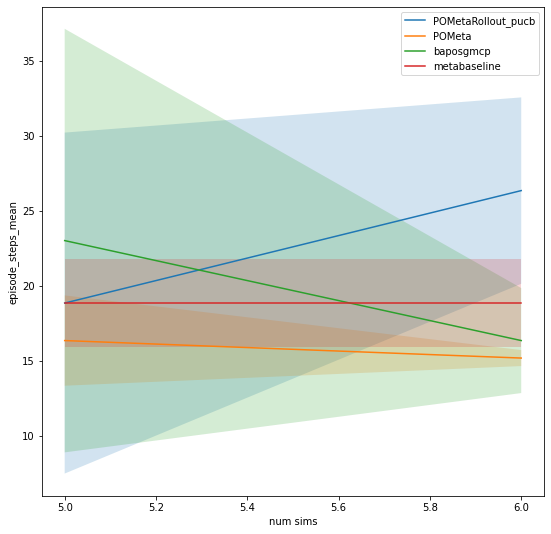

In [15]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_steps_mean",
    y_err_key="episode_steps_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

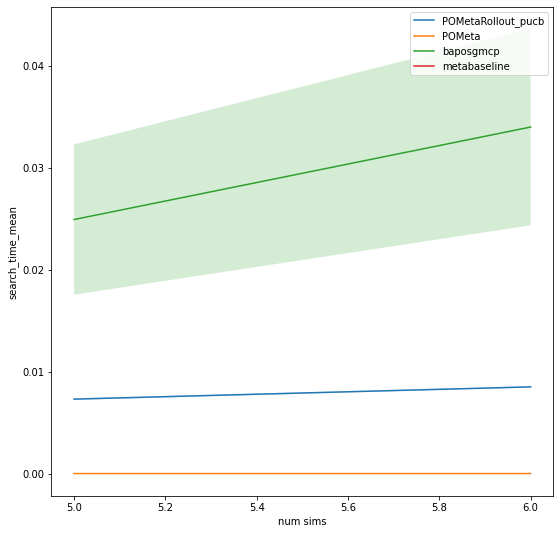

In [16]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

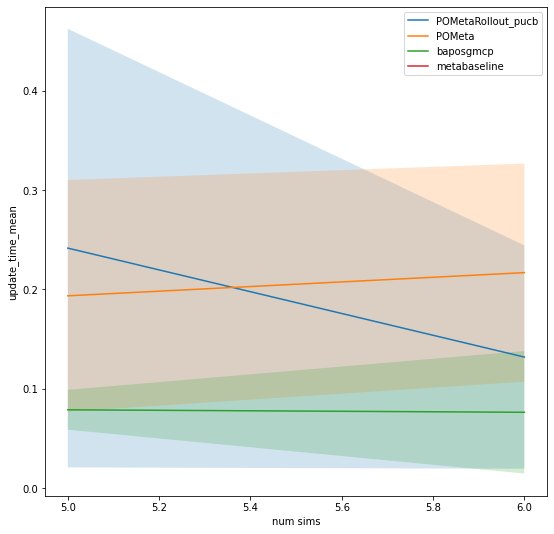

In [17]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

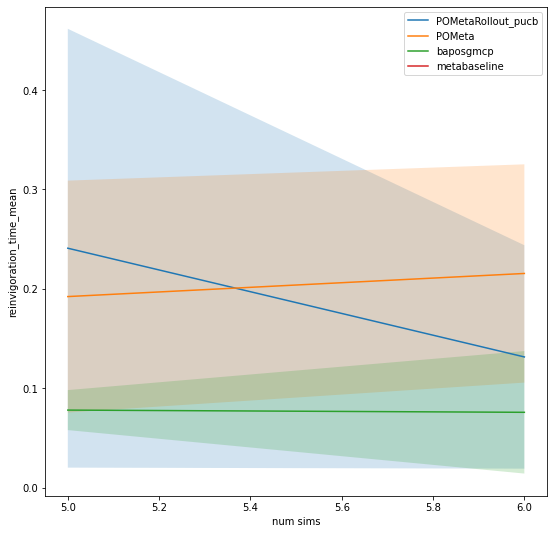

In [18]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

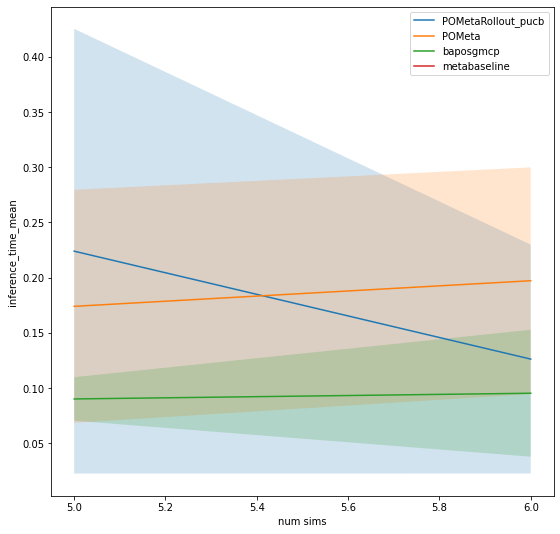

In [19]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

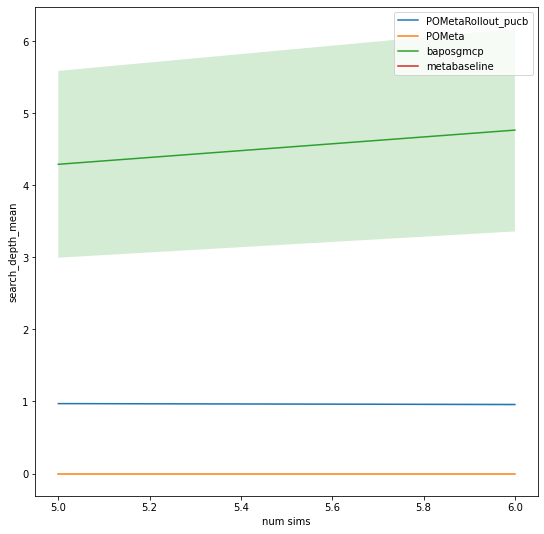

In [20]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)